In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [99]:
import pandas_bokeh
pandas_bokeh.output_notebook()
init_notebook_mode(connected=True)
cf.go_offline()

Loading BokehJS ...

In [100]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Data Science Capstone\Project 2\Healthcare - Diabetes\diabetes.csv")

In [101]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [103]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Glucose'>

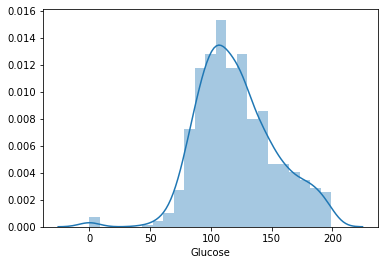

In [105]:
sns.distplot(df['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

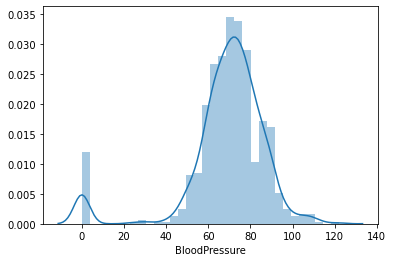

In [106]:
sns.distplot(df['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness'>

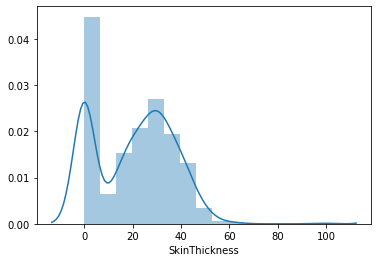

In [107]:
sns.distplot(df['SkinThickness'])

<AxesSubplot:xlabel='Insulin'>

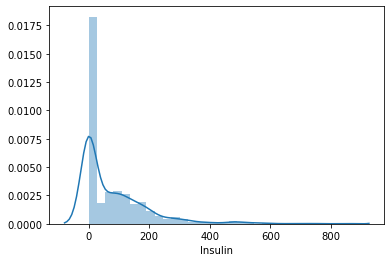

In [108]:
sns.distplot(df['Insulin'])

In [109]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
zero =[]

In [110]:
def calculate_zero(df,col):
    for i in col:
       val=df[df[i]==0].shape[0]
       zero.append(val)

In [111]:
calculate_zero(df,col)

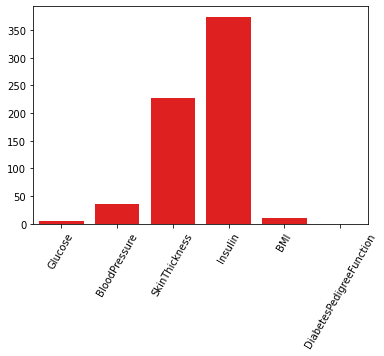

In [112]:
plt.figure(figsize=(6,4))
sns.barplot(x=col,y=zero,color='red')
plt.xticks(rotation=60)
plt.show()

### Here we found the zero's in these columns are null values.
We need to impute some missing values treatment to make the data clean and further used for the processing..

Lets explore on the distribution for non zeros values in these columns

In [113]:
df1 = df.copy()

In [114]:
temp = df1[df1['Glucose']!=0]

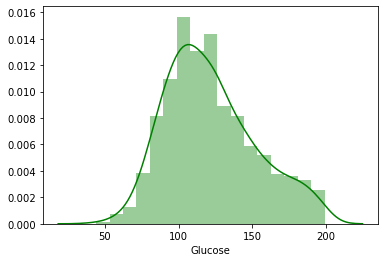

In [115]:
sns.distplot(temp['Glucose'],color='green')
plt.show()

We can see that for non zero datas in Glucose are normally distributed

In [116]:
temp['Glucose'].describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [117]:
temp = df1[df1['BloodPressure']!=0]

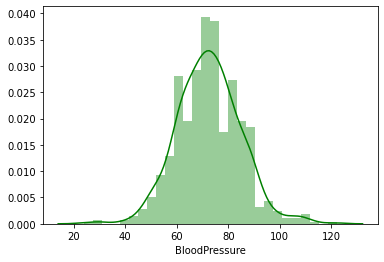

In [118]:
sns.distplot(temp['BloodPressure'],color='green')
plt.show()

In [119]:
temp['BloodPressure'].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [120]:
temp = df1[df1['SkinThickness']!=0]

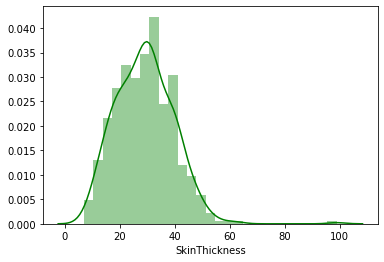

In [121]:
sns.distplot(temp['SkinThickness'],color='green')
plt.show()

In [122]:
temp['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

There are some outlier in the skinthickness columns. We could see that there is skeness to the right. There is huge difference between 75% and max value. Lets check the records above 75 percentile

In [123]:
temp[temp['SkinThickness']>temp['SkinThickness'].quantile(0.99)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0
86,13,106,72,54,0,36.6,0.178,45,0
120,0,162,76,56,100,53.2,0.759,25,1
211,0,147,85,54,0,42.8,0.375,24,0
445,0,180,78,63,14,59.4,2.420,25,1
579,2,197,70,99,0,34.7,0.575,62,1


We could see that there only one SkinThickness value 99 which should be an outlier.

In [124]:
temp = df1[df1['Insulin']!=0]

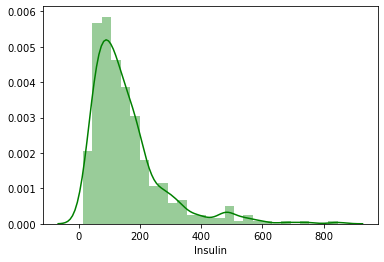

In [125]:
sns.distplot(temp['Insulin'],color='green')
plt.show()

In [126]:
temp['Insulin'].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

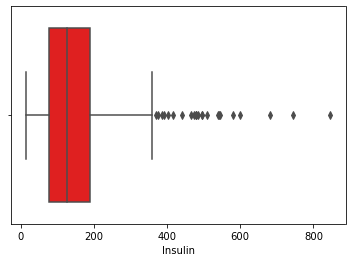

In [127]:
sns.boxplot(temp['Insulin'],color='red')
plt.show()

In [128]:
temp[temp['Insulin']>temp['Insulin'].quantile(0.99)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
584,8,124,76,24,600,28.7,0.687,52,1


In [129]:
temp = temp[~(temp['Insulin']>580)]

In [130]:
temp['Insulin'].median()

125.0

In [131]:
temp = temp[~(temp['SkinThickness']>80)]

In [132]:
temp['SkinThickness'].median()

29.0

In [133]:
df2 = df.copy()

In [134]:
df2 = df2[~(df2['Insulin']>580)]

In [135]:
df2 = df2[~(df2['SkinThickness']>80)]

In [136]:
df2.shape

(763, 9)

Lets impute the missing value treatment. We will try to put median in this case 

In [137]:
df2['SkinThickness'] = df2['SkinThickness'].apply(lambda x: 29 if x==0 else x)

In [138]:
df2['Insulin'] = df2['Insulin'].apply(lambda x: 125 if x==0 else x)

In [139]:
df2['Glucose'] = df2['Glucose'].apply(lambda x: 121 if x==0 else x)

In [140]:
df2['BloodPressure'] = df2['BloodPressure'].apply(lambda x: 72 if x==0 else x)

In [141]:
df2['BMI'] = df2['BMI'].apply(lambda x: 32 if x==0 else x)

In [142]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,125,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,125,30.1,0.349,47,1


In [143]:
df2['Outcome'].value_counts()

0    498
1    265
Name: Outcome, dtype: int64

There is inbalance between the classification. We will make OverSampling technic overcome the imbalance. Let try to make them balance

In [144]:
df2['DiabetesPedigreeFunction'].mean() + 3 * df2['DiabetesPedigreeFunction'].std()

1.4453620334933344

In [145]:
df2 = df2[~(df2['DiabetesPedigreeFunction']>1.4)]

In [146]:
df2.shape

(751, 9)

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

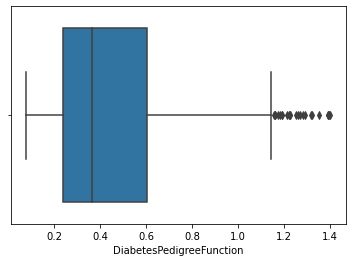

In [147]:
sns.boxplot(df2['DiabetesPedigreeFunction'])

In [148]:
fig = px.scatter(df2, x="Glucose", y="Insulin", color="Outcome",
                 size='Insulin')
fig.show()

In [149]:
df4 = df2.copy()

In [150]:
df4 = df4[~(df4['DiabetesPedigreeFunction']>1.1)]

In [151]:
c1,c2 = df4['Outcome'].value_counts()

In [152]:
clas_0 = df4[df4['Outcome']==0]
clas_1 = df4[df4['Outcome']==1]

In [153]:
clas_1 = clas_1.sample(c1,replace=True)

In [154]:
new_bal_df = pd.concat([clas_0,clas_1],axis=0)

In [155]:
new_bal_df['Outcome'].value_counts()

1    482
0    482
Name: Outcome, dtype: int64

In [156]:
corr = df2.corr()

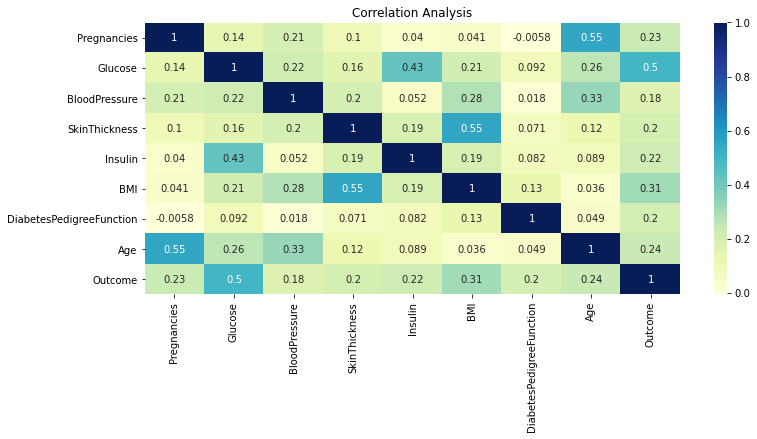

In [157]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,cmap='YlGnBu',vmax=1,annot=True)
plt.title('Correlation Analysis')
plt.show()

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
x = new_bal_df.drop(['Outcome'],axis=1)

In [161]:
y=new_bal_df['Outcome']

In [162]:
scaler = StandardScaler()

In [163]:
x_new = scaler.fit_transform(x)

In [164]:
y = new_bal_df['Outcome']

Lets split the data for training and testing. We will make a split of 20 % for testing and 80 % for training

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=24)

In [166]:
lg = LogisticRegression()

In [167]:
lg.fit(x_train,y_train)

LogisticRegression()

In [168]:
y_pred = lg.predict(x_test)

In [169]:
accuracy_score(y_test,y_pred)

0.6994818652849741

In [170]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.72      0.68        88
           1       0.74      0.69      0.71       105

    accuracy                           0.70       193
   macro avg       0.70      0.70      0.70       193
weighted avg       0.70      0.70      0.70       193



In [171]:
knn = KNeighborsClassifier(n_neighbors=3)

In [172]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [173]:
y_pred = knn.predict(x_test)

In [174]:
accuracy_score(y_test,y_pred)

0.8186528497409327

In [175]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        88
           1       0.81      0.88      0.84       105

    accuracy                           0.82       193
   macro avg       0.82      0.81      0.82       193
weighted avg       0.82      0.82      0.82       193



In [176]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rc = RandomForestClassifier(n_estimators=100,criterion='gini')

In [85]:
rc.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred = rc.predict(x_test)

In [87]:
accuracy_score(y_test,y_pred)

0.8601036269430051

In [88]:
rc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [314]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [316]:
rf_random = RandomizedSearchCV(estimator = rc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [317]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [318]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

In [319]:
rc1 = RandomForestClassifier(n_estimators=800,criterion='gini',bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2)

In [320]:
rc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)

In [321]:
y_pred = rc1.predict(x_test)

In [322]:
accuracy_score(y_test,y_pred)

0.8823529411764706

In [180]:
import pickle

In [181]:
pickle.dump(lg,open('model.pkl','wb'))

In [182]:
model = pickle.load(open('model.pkl','rb'))